In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\silpa\Downloads\archive (5)\webmd.csv")

In [3]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [4]:
data.drop("DrugId", axis=1, inplace=True)

In [5]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'EaseofUse', 'Effectiveness',
       'Reviews', 'Satisfaction', 'Sex', 'Sides', 'UsefulCount'],
      dtype='object')

In [6]:
data.shape

(362806, 11)

In [7]:
data.dtypes

Age              object
Condition        object
Date             object
Drug             object
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [8]:
data.describe()

,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000
mean,4.019829,3.532061,3.135408,6.744916
std,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,0.000000
25%,3.000000,3.000000,1.000000,1.000000
50%,5.000000,4.000000,3.000000,4.000000
75%,5.000000,5.000000,5.000000,9.000000
max,10.000000,10.000000,10.000000,255.000000


In [9]:
data.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [10]:
# Fill missing values with the mode for categorical columns
data.fillna(data.mode().iloc[0], inplace=True)


# Verify the filled missing values
null_values = data.isnull().sum()
print("\nAfter filling missing values:")
print(null_values)


After filling missing values:
Age              0
Condition        0
Date             0
Drug             0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64


Univariate Analysis

In [11]:
data['UsefulCount'].value_counts()

0      71608
1      46240
2      34701
3      27307
4      22862
       ...  
136        1
178        1
176        1
169        1
95         1
Name: UsefulCount, Length: 148, dtype: int64

In [12]:
data['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

<Axes: ylabel='Frequency'>

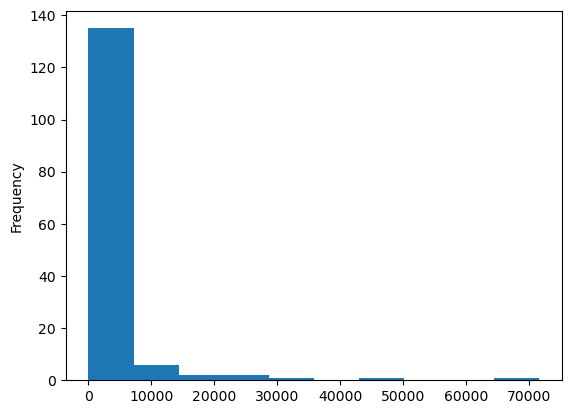

In [13]:
data['UsefulCount'].value_counts().plot.hist()

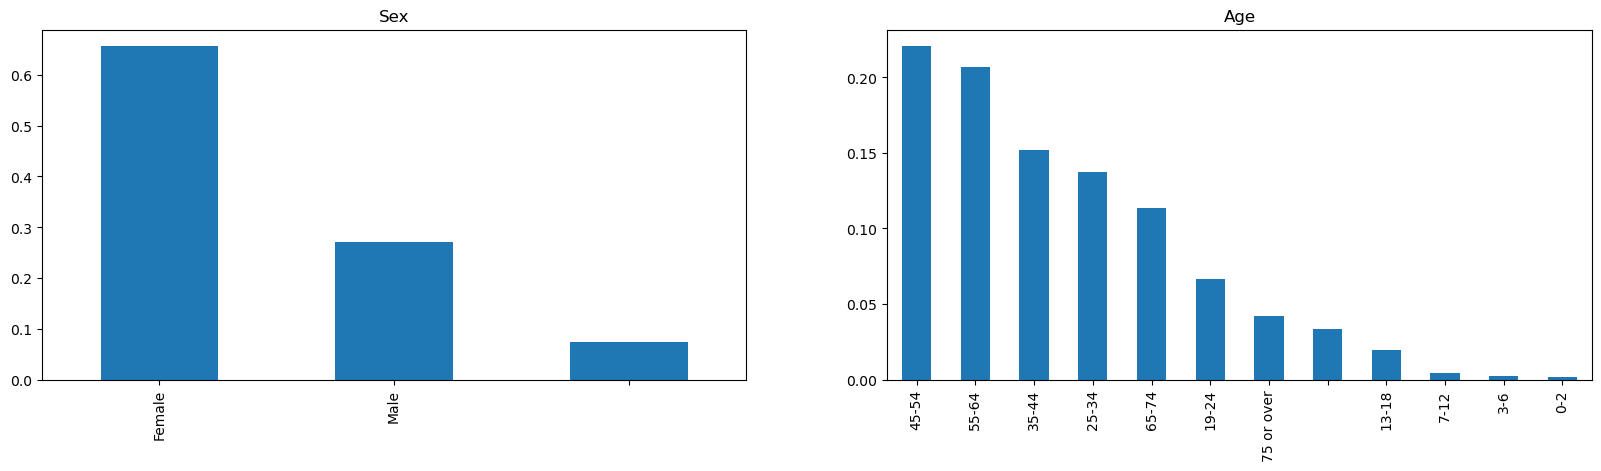

In [14]:
#Independent Variable (Categorical)
plt.figure(1) ,plt.subplot(221) 
data['Sex'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Sex') 
plt.subplot(222) 
data['Age'].value_counts(normalize=True).plot.bar(title= 'Age') 






plt.show()

Bivariate Analysis 

<Axes: xlabel='Sex'>

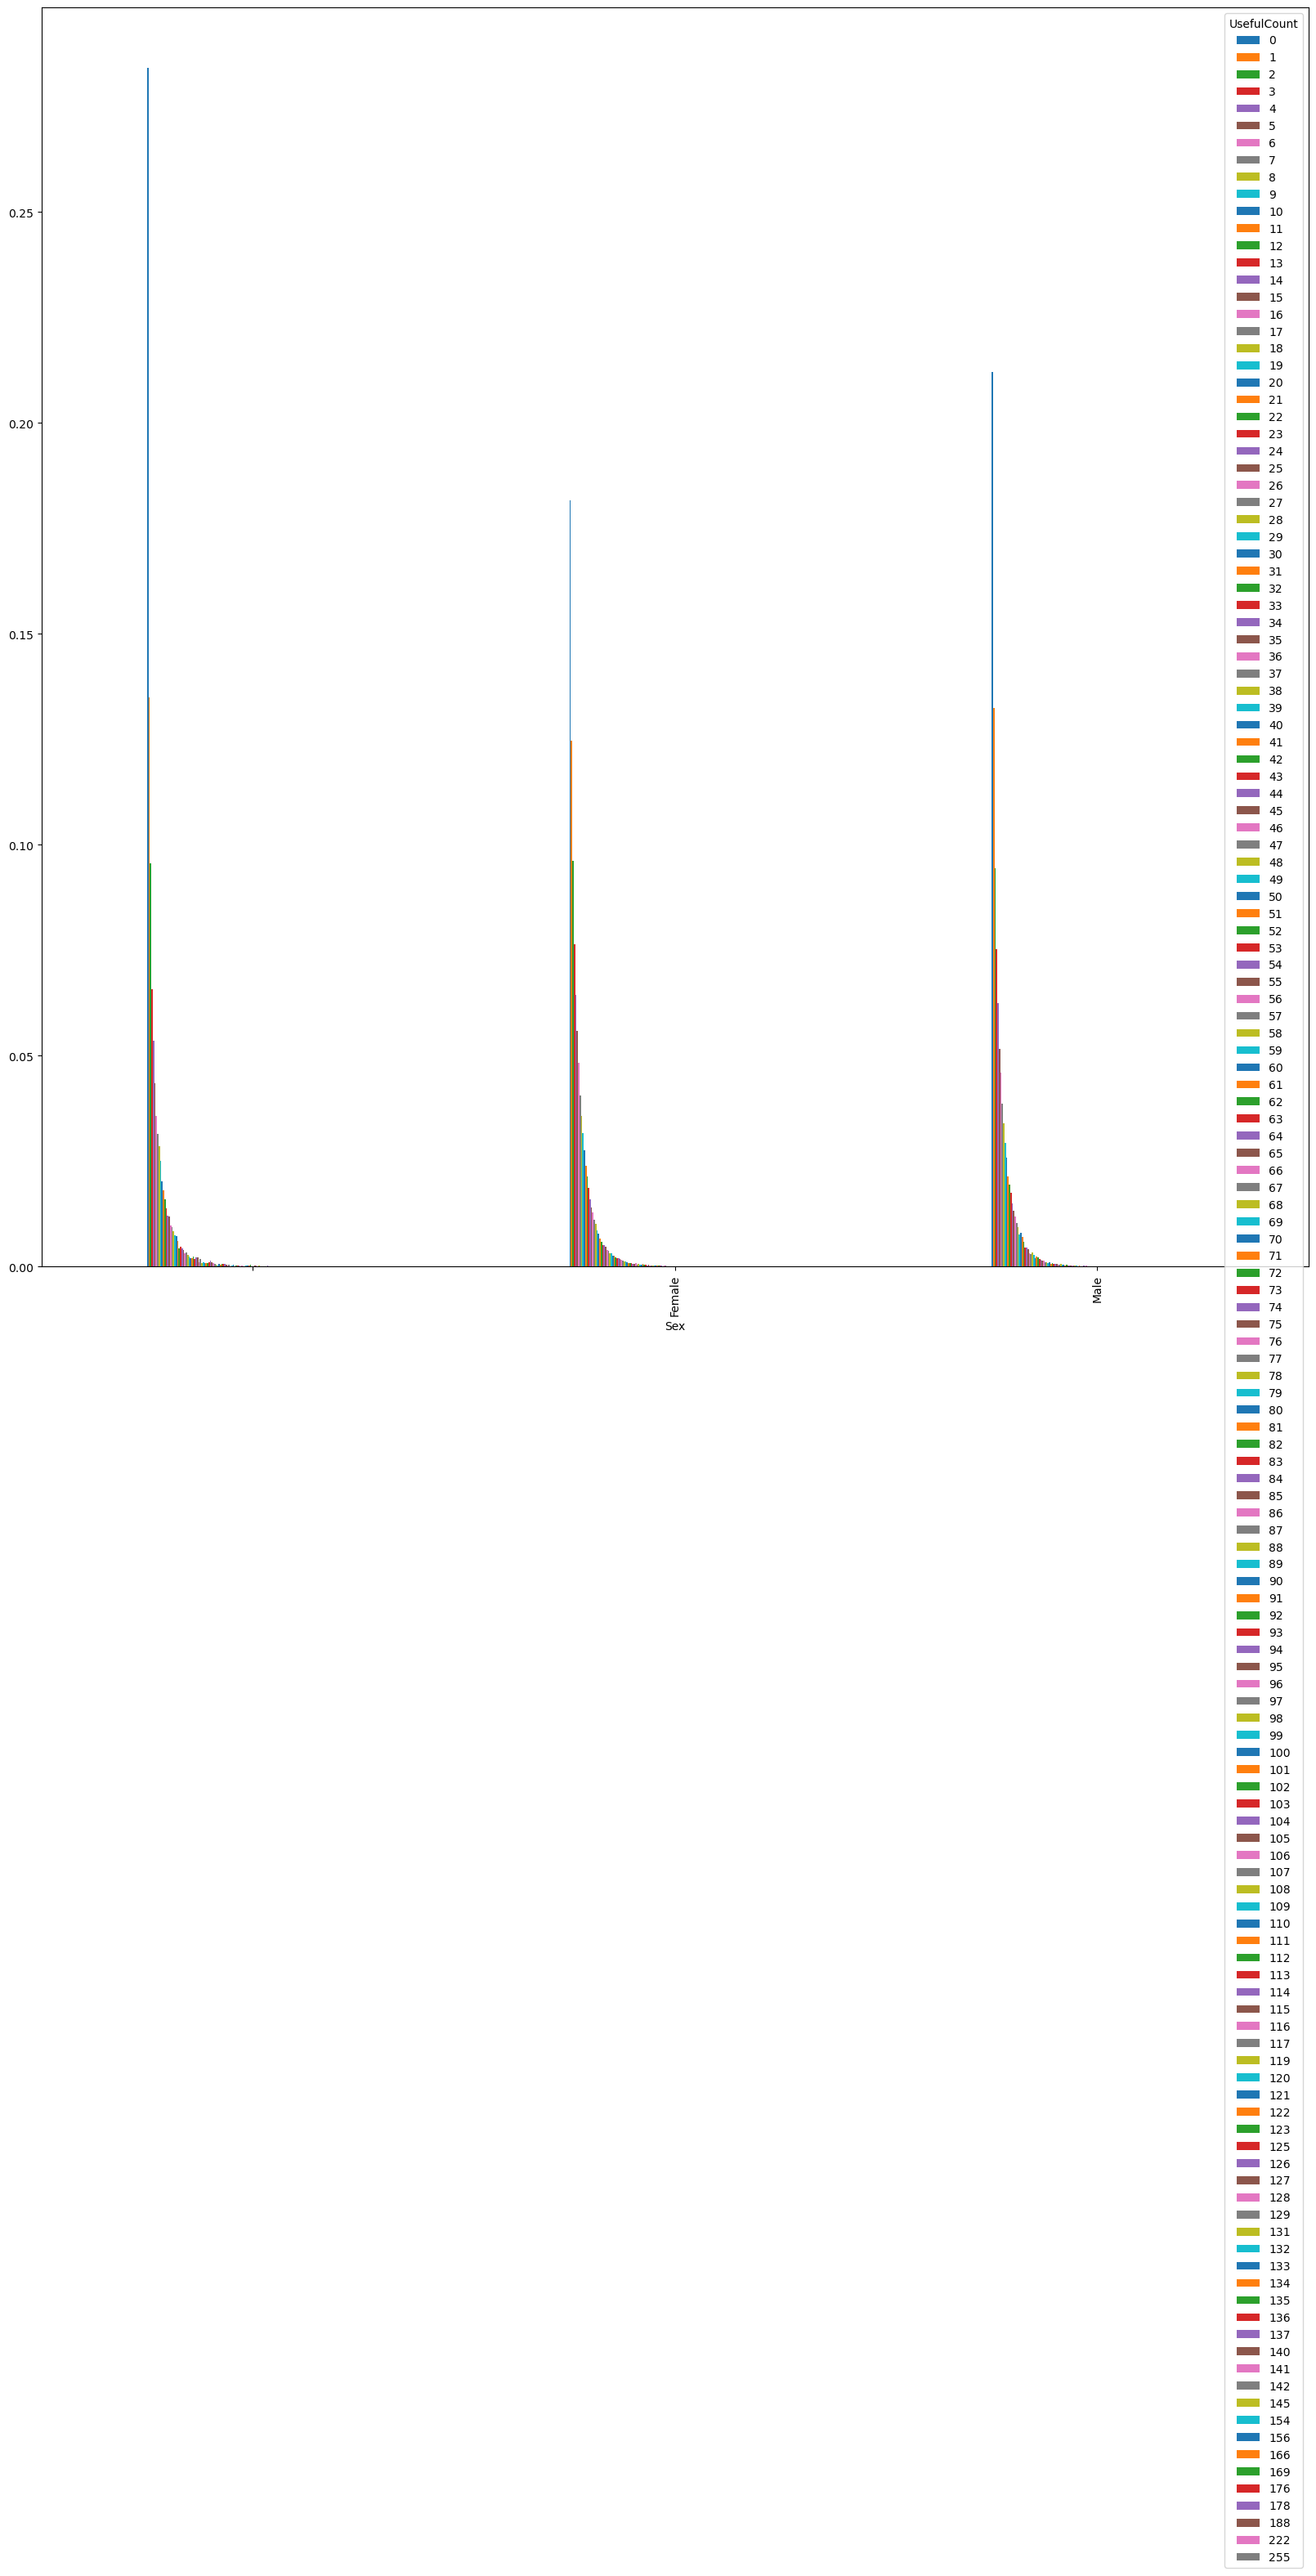

In [15]:
Sex=pd.crosstab(data['Sex'],data['UsefulCount']) 
Sex.div(Sex.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(20,20))

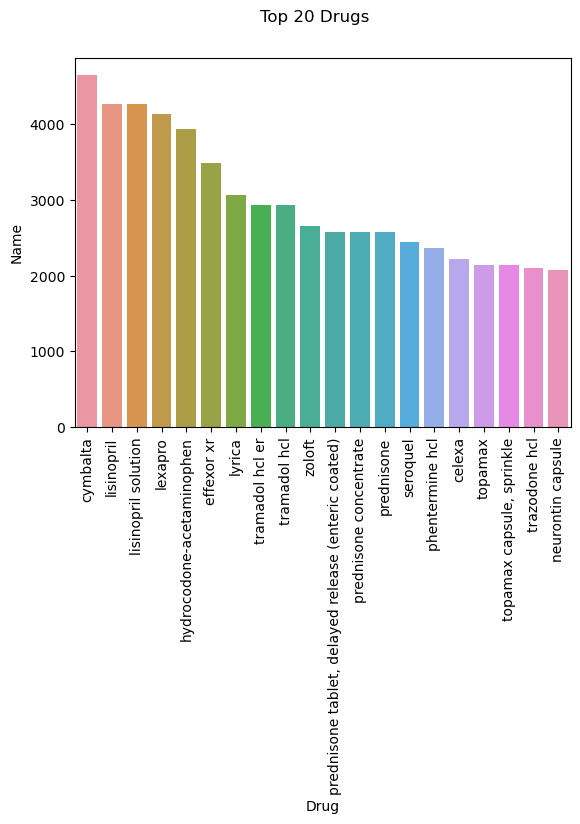

In [16]:
#Top 20 Drugs based on No. of Users

data_= data['Drug'].value_counts().head(20).reset_index()
data_.columns = ['Drug', 'Name']
sns.barplot(data=data_, x = 'Drug', y = 'Name')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()
#Cymbalta tops the list followed by Lisinopril. It is to be noted that all the 20 drugs has been used by more than atleast 2000 people

Cymbalta tops the list followed by Lisinopril. It is to be noted that all the 20 drugs has been used by more than atleast 2000 people

Text(0, 0.5, 'Users')

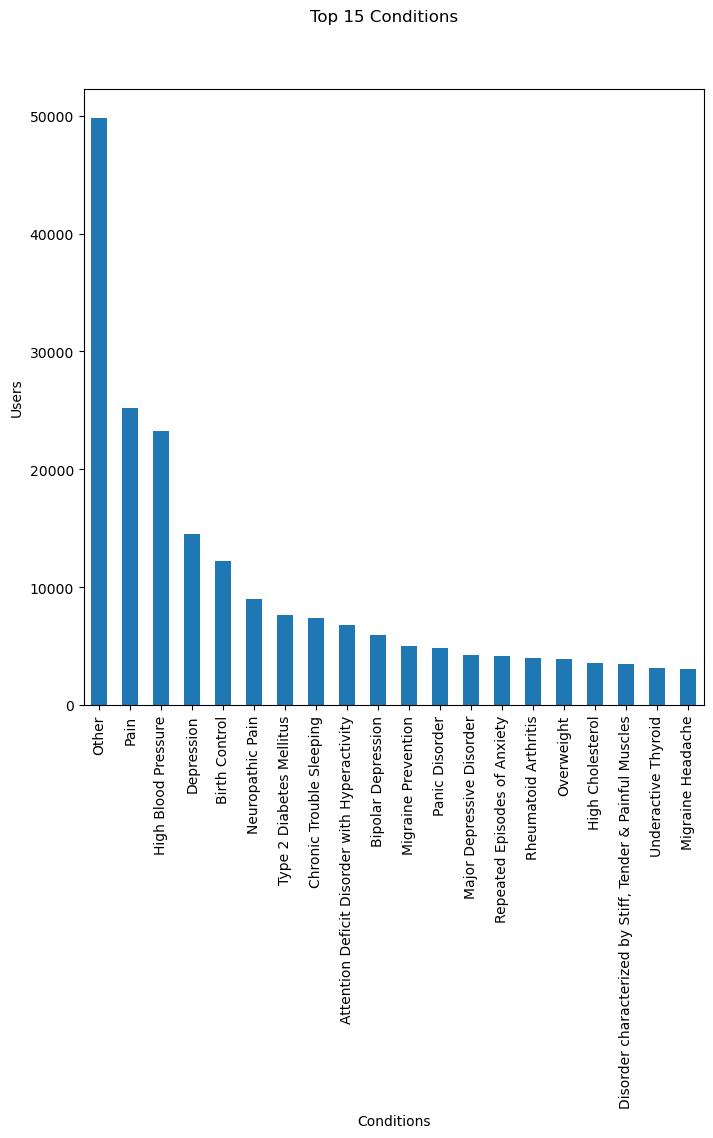

In [17]:
#Top 15 Conditions

data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 15 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

 Which gender is the predominant user?

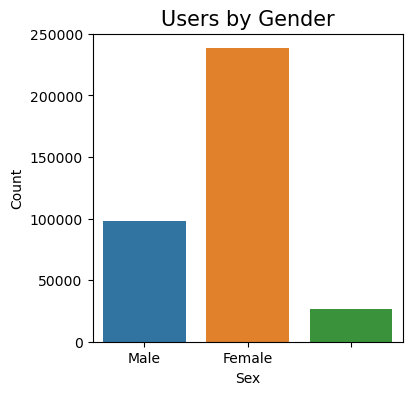

In [18]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex',data=data)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

Female users are predominant

In each age group, which gender is the predominant user?

Text(0.5, 1.0, 'Users by Age and Gender')

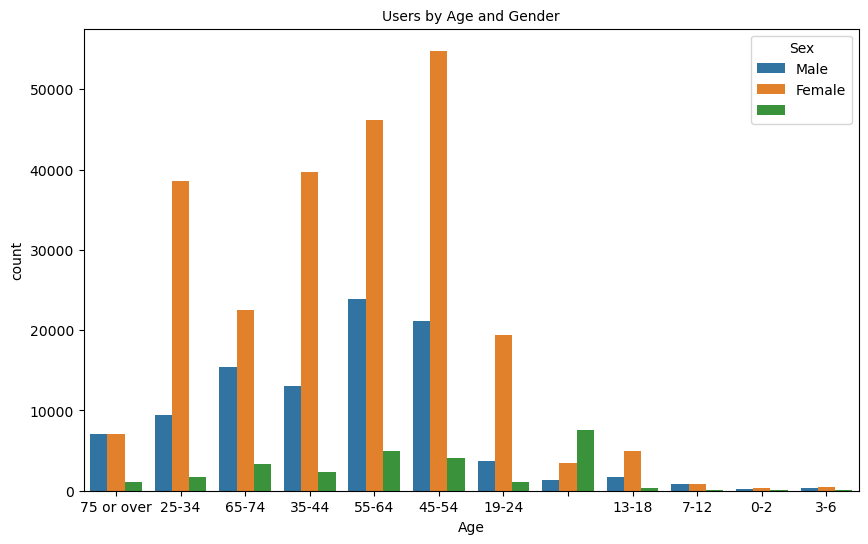

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data)
plt.title("Users by Age and Gender", fontsize = 10)

In [20]:
data['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

how effective is the drug? 

Text(0, 0.5, 'Count')

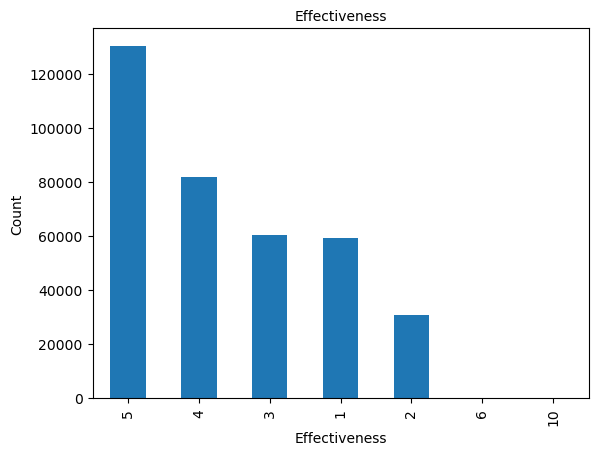

In [21]:
data['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

How effective is the drug among both the gender category?

<Figure size 1000x800 with 0 Axes>

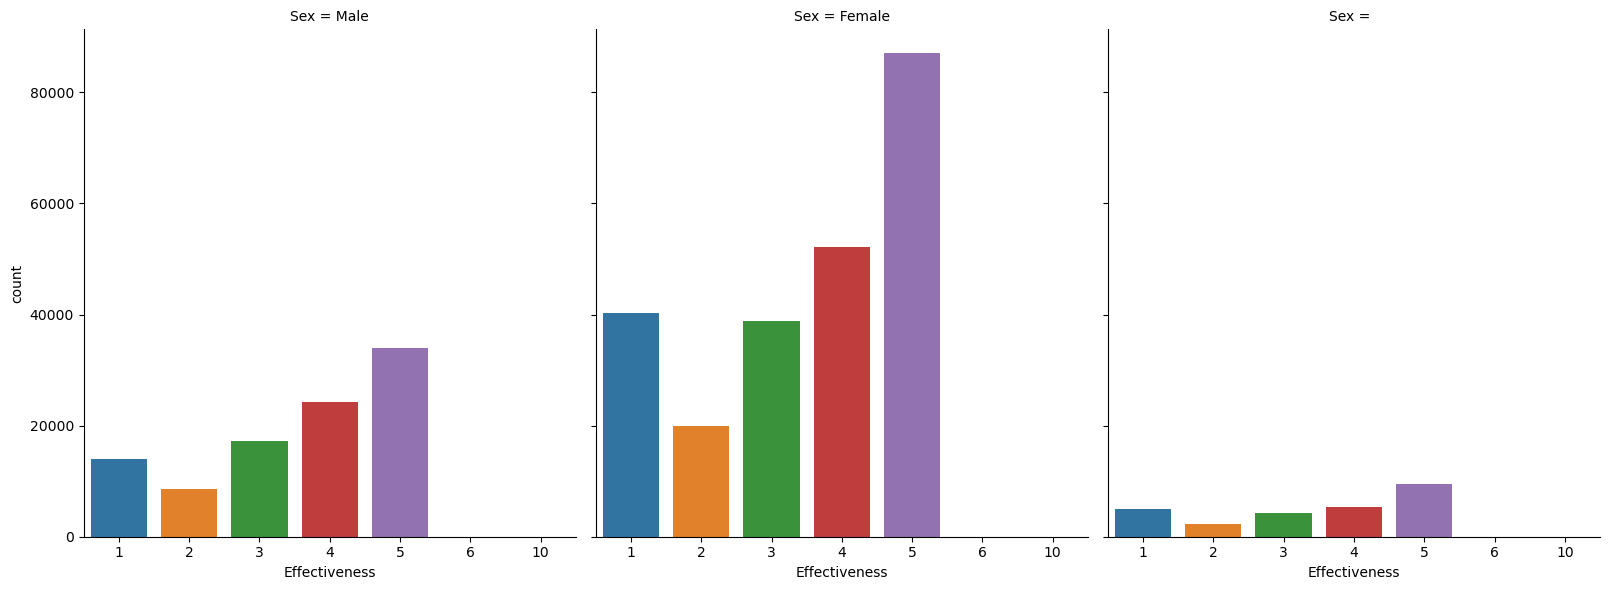

In [22]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data, kind="count",
                height=6,aspect =.9);

In [23]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'EaseofUse', 'Effectiveness',
       'Reviews', 'Satisfaction', 'Sex', 'Sides', 'UsefulCount'],
      dtype='object')

In [24]:
data['Date'].value_counts()

10/29/2007    404
10/30/2007    316
10/28/2007    315
3/15/2010     308
3/16/2010     295
             ... 
10/19/2019      2
10/27/2019      1
10/20/2019      1
6/28/2019       1
6/22/2019       1
Name: Date, Length: 4524, dtype: int64

In [25]:
df = pd.DataFrame(data)

# Convert the 'date' column to datetime with the specified format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract the year and store it in the 'date' column
df['Date'] = df['Date'].dt.year

In [26]:
data.dtypes

Age              object
Condition        object
Date              int64
Drug             object
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [27]:
data.dtypes

Age              object
Condition        object
Date              int64
Drug             object
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [28]:
data.head()

,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,2014,25dph-7.5peh,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,2011,25dph-7.5peh,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,2012,warfarin (bulk) 100 % powder,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,2010,warfarin (bulk) 100 % powder,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,2009,warfarin (bulk) 100 % powder,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [29]:
# Create a DataFrame with an 'Age' column containing age ranges
df = pd.DataFrame(data)


# Convert the 'Age' column to float values while handling various age range formats
def convert_age(age_str):
    try:
        return float(age_str)
    except ValueError:
        if 'or over' in age_str:
            return 75  # You can set this to another value if needed
        elif '-' in age_str:
            # Split the age range and calculate the average
            age_range = age_str.split('-')
            try:
                age_min = float(age_range[0])
                age_max = float(age_range[1])
                return (age_min + age_max) / 2
            except ValueError:
                return None  # Handle invalid age range format
        else:
            return None  # or another placeholder value

df['Age'] = df['Age'].apply(convert_age)





In [30]:
data.dtypes

Age              float64
Condition         object
Date               int64
Drug              object
EaseofUse          int64
Effectiveness      int64
Reviews           object
Satisfaction       int64
Sex               object
Sides             object
UsefulCount        int64
dtype: object

C:\Users\silpa\AppData\Local\Temp\ipykernel_9008\881164037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr() ; ax = plt.subplots(figsize=(9, 6))


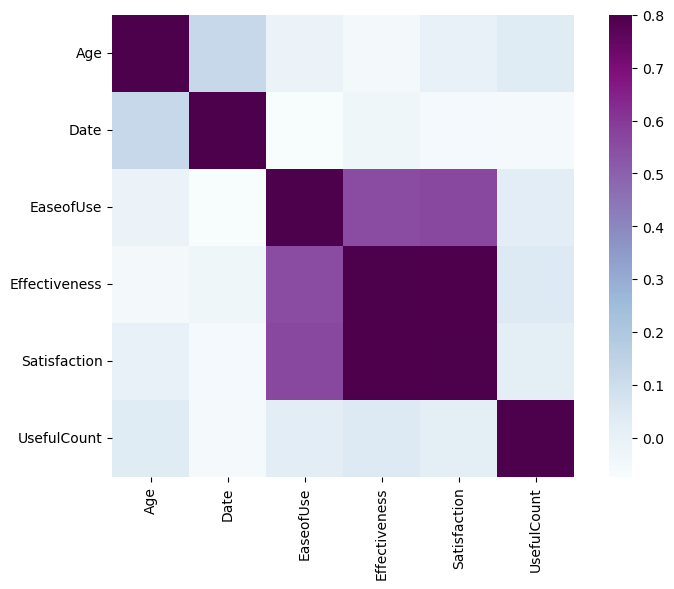

In [31]:
matrix = data.corr() ; ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

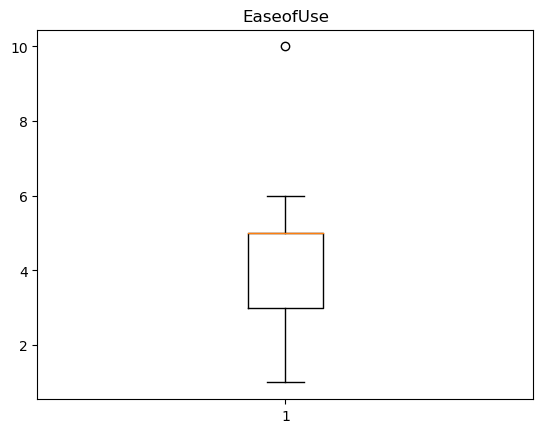

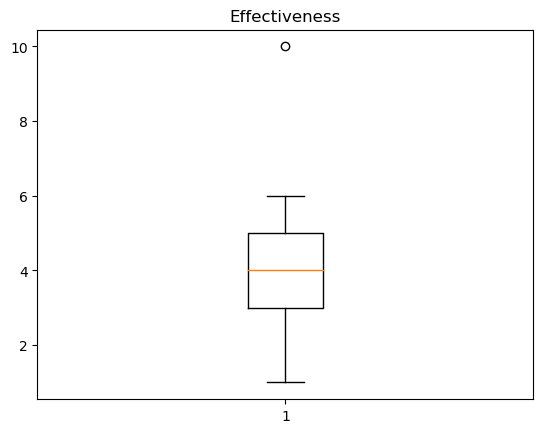

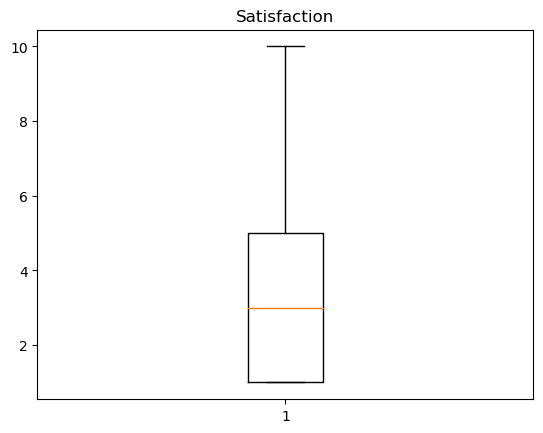

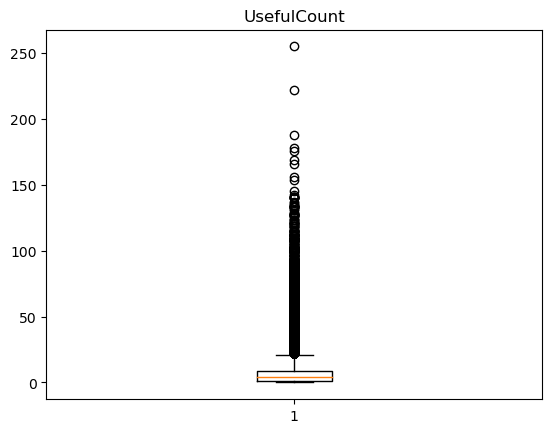

In [32]:
# Outlier Treatment
num_cols = ['EaseofUse','Effectiveness','Satisfaction','UsefulCount']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [33]:
data.head()

,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75.0,Stuffy Nose,2014,25dph-7.5peh,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,29.5,Cold Symptoms,2011,25dph-7.5peh,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,69.5,Other,2012,warfarin (bulk) 100 % powder,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75.0,Other,2010,warfarin (bulk) 100 % powder,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,39.5,Other,2009,warfarin (bulk) 100 % powder,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [34]:
data['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

Label Encoding 

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Drug'] = le.fit_transform(data['Drug'])

In [36]:
data.dtypes

Age              float64
Condition         object
Date               int64
Drug               int32
EaseofUse          int64
Effectiveness      int64
Reviews           object
Satisfaction       int64
Sex               object
Sides             object
UsefulCount        int64
dtype: object

In [37]:
data['Condition'].value_counts()

Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: Condition, Length: 1806, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Condition'] = le.fit_transform(data['Condition'])

In [39]:
data.dtypes

Age              float64
Condition          int32
Date               int64
Drug               int32
EaseofUse          int64
Effectiveness      int64
Reviews           object
Satisfaction       int64
Sex               object
Sides             object
UsefulCount        int64
dtype: object

In [40]:
columns_to_drop = ['Age','Sides','Reviews','Sex']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [41]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
columns_to_scale = ['UsefulCount','Satifaction','Effectiveness']


In [42]:
#splitting data to feature and target
X = data.drop('Drug',axis=1)# Target column(Drug)
y = data['Drug']

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [44]:
data.isnull().sum()

Condition        0
Date             0
Drug             0
EaseofUse        0
Effectiveness    0
Satisfaction     0
UsefulCount      0
dtype: int64

kNN

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [48]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)
    

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

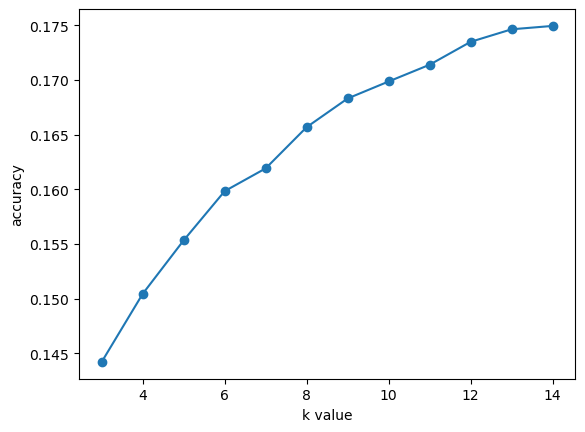

In [49]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid

In [51]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy =',accuracy_score(y_test,y_pred_knn))
print('precision =',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall =',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_knn,average='macro'))

Accuracy = 0.15534387334347644


C:\Users\silpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision = 0.06283708675129061


C:\Users\silpa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall = 0.05770167747232388
f1 score = 0.05372569082029771


MSE

In [53]:
from sklearn.metrics import mean_squared_error
#Train the kNN model
k = 1  # You can choose your desired value for k
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = knn_model.predict(X_test)

# Step 4: Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Step 5: Print or use the MSE
print("Mean Squared Error:", mse)

Mean Squared Error: 5312516.113757139


SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can experiment with different kernels

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Decision Tree 

In [ ]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a classification report with precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=drugs.target_names)
print("Classification Report:\n", report)


HyperParameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [10, 30, 50, 70, 90, 110, 130, 150]}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)



C:\Users\silpa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters:  {'n_neighbors': 30}
Best Score:  0.18388190837247398


In [58]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy: ", accuracy)

Test Set Accuracy:  0.18270820930078718
